Student Details

Name: Fergus Mc Hale

ID: 18203485

All necessary imports are provided. Please do not add further imports.

In [1]:
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import numpy as np
import random
import math
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold

Below is the exact same data you used for the regression in E-tivity 3, but this time you know exactly what function generated the data

In [2]:
def target(X):
    #return: 0.5X^5-0.5X^3-4.25X^2+5.125X-0.4375
    return 0.5*((X-.5)-10*(X-.5)**2-(X-.5)**3+X**5)+1

points = 100
X = np.linspace(0, 1, points) # 100 values between 0 and 100
noise= np.random.random(points)/4
y_nf = target(X) #noise free target
y = y_nf+noise #noisy target

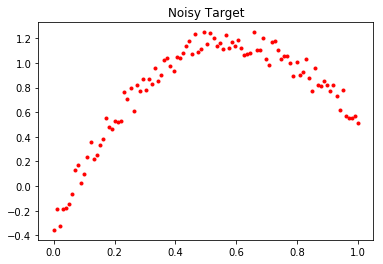

In [3]:
plt.title('Noisy Target')
plt.plot(X,y,'r.')
plt.show()

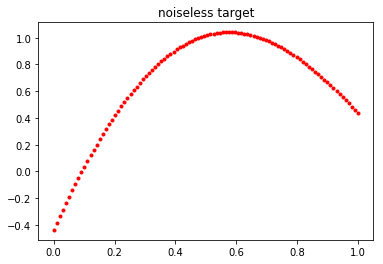

In [4]:
plt.title('noiseless target')
plt.plot(X,y_nf,'r.')
plt.show()

Below is an implementation of linear regression with regularization

In [5]:
def weights_reg(X,y,l):
    n = len(X)
    m=X.T.dot(X)
    return np.linalg.inv(m+l*np.identity(m.shape[0])).dot(X.T).dot(y)

In [6]:
def lin_reg(w,X):
    # Calculation of outputs given weights and data (X). Note that X needs to contain the bias of 1. 
    out=[]
    for x in X:
        out.append(w.T.dot(x))
    return np.array(out)

In [7]:
def calc_error(w,X,y):
    # Calculate the error as the mean squared error
    pred = lin_reg(w,X)
    return math.sqrt((pred-np.array(y)).dot(pred-np.array(y))/len(X))

To create higher order features:

In [8]:
def transPoly(X, power):
    # Extend the data in X with a bias (1) and powers of the feature up to 'power'
    ones = np.ones((X.shape[0],1))
    extra=[]
    for x in X:
        row=[]
        for p in range(2,power+1):
            row.append(x**p)
        extra.append(row)
    return np.concatenate((ones, X.reshape(len(X),1),np.array(extra)),1)

Iterate over lambda, train the model and calculate Eout. Plot the latter versus lambda to see how much regularization is required.

In [9]:
ein=[]
eout=[]
weights=[]

lambdas = np.logspace(-10, 0, num=1000) #Lamba is infinite
X_trans = transPoly(X,50)
# random_state fixed to get reproducible (and 'good'! :-)) results
X_train, X_test, y_train, y_test = train_test_split(X_trans, y, train_size=0.9, random_state =5)
for l in lambdas:    
    w = weights_reg(X_train,y_train,l)
    ein.append(calc_error(w,X_train,y_train))
    eout.append(calc_error(w,X_test,y_test))
    weights.append(w)

In [10]:
LAMBDAS_ALPHAS = np.logspace(-10, 0, num=1000)
K_FOLDS = 10

# Task 4.1 

Using the above code, find the optimum regularization parameter, l. In order to do so, you will need to decide on a suitable list of l values. Pick at most 1000 values! Once you have found the optimal l, compare the Eout obtained with this l with the Eout obtained without regularization. You should see an impressive improvement!

In [23]:
w = weights_reg(X_train, y_train, 0)
eout_no_reg = calc_error(w, X_test, y_test)

print('Eout with regularization    :',  eout[min_err_idx])
print('Eout without regularization :',  eout_no_reg)
print('Difference is error Eout <with/out regularization> :', eout_no_reg - eout[min_err_idx])

Eout with regularization    : 0.07185743616464631
Eout without regularization : 0.5857991536252635
Difference is error Eout <with/out regularization> : 0.5139417174606171


# Task 4.2 Provide the following plots:

  * A plot showing the estimate of Eout vs l on the domain [0,1]
  * A plot with three sub-plots containing an overfitted model, a model with the optimal l, and an underfitted model. 
  
In each plot, you should plot the target function in addition to the final hypothesis. Choose values for l that clearly demonstrate over- and underfitting.

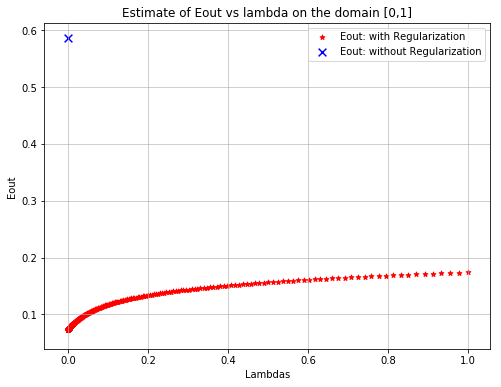

In [24]:
plt.figure(figsize=(8,6))

# Plot for all 1000 values of lambdas[0,1]
plt.scatter(lambdas, eout, color='r', marker='*', s=25, label='Eout: with Regularization')

# Eout with no regularization
plt.scatter(0, eout_no_reg, color='b', marker='x', s=60, label='Eout: without Regularization')

plt.title('Estimate of Eout vs lambda on the domain [0,1]')
plt.xlabel('Lambdas')
plt.ylabel('Eout')

plt.legend(loc='best')
plt.grid(alpha=0.75)
plt.show()

In [13]:
 def calc_prediction(weights, X): 
    # From previous notebook
    h = weights[0]
    for i in np.arange(1, len(weights)):
        h += weights[i]*X ** i    
    return h 

In [14]:
def regularisation(X,y,l):
    ein=[]
    eout=[]
    pred=[]

    X_trans = transPoly(X,50)
    # random_state fixed to get reproducible (and 'good'! :-)) results
    X_train, X_test, y_train, y_test = train_test_split(X_trans, y, train_size=0.9, random_state =5)
   
    w = weights_reg(X_train,y_train,l)
    ein.append(calc_error(w,X_train,y_train))
    eout.append(calc_error(w,X_test,y_test))
    pred=calc_prediction(w,X)
    
    plt.plot(X, y, 'r.')
    plt.plot(X, pred , 'b-')
    plt.show()

# Overfit

The lambda param is set to 0 causing the line to overfit.

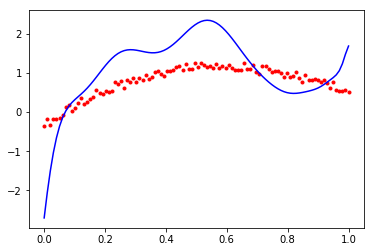

In [15]:
regularisation(X,y,0)

# Correct fit

The lambda param has been set to the best value causing the line to fit correctly to the data

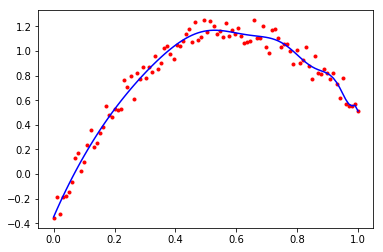

In [16]:
regularisation(X,y,opt_lambda)

# Underfit

The lambda/alpha param has been set to value of 1.

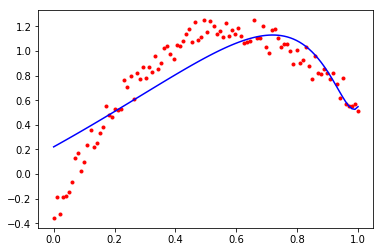

In [17]:
regularisation(X,y,1)

# Task 5 (CE6002)
  * Use the code from Task 4 and perform the same analysis using 10-fold cross-validation. 
  * Use Scikitlearn’s KFOLD for this and think carefully about the parameters you use in KFOLD.
  * Note that the data set provided is ordered by increasing X.

In [43]:
def dataset_cross_val(X,y,lambdas,num_folds=10):
    overall_eout=[]
    X_trans = transPoly(X,50)
    
    for usr_lambda in lambdas:
        
        ein=[]
        eout=[]
        average_eout=[]
        
        # Split data into training and test data sets
        kf = KFold(n_splits=num_folds, shuffle=True,random_state = 5)

        # random_state fixed to get reproducible (and 'good'! :-)) results
        fold = 1
        for train_index, test_index in kf.split(X_trans):
            # Training data
            X_train_CV = X_trans[train_index]
            y_train_CV = y[train_index]
    
            # Testing data
            X_test_CV = X_trans[test_index]
            y_test_CV = y[test_index]
   
            w = weights_reg(X_train_CV,y_train_CV,usr_lambda)
            ein.append(calc_error(w,X_train_CV,y_train_CV))
            local_eout = calc_error(w,X_test_CV,y_test_CV)
            eout.append(local_eout)
            print("K-Fold:", fold, ", Eout: ", local_eout)
            fold += 1
        
        avg_eout = np.mean(eout)
        print("Average Eout: ",avg_eout)
        overall_eout.append(avg_eout)
    
    min_eout_index = np.argmin(overall_eout)
    optimal_lambda_CV = lambdas[min_eout_index]
    return optimal_lambda_CV, overall_eout[min_eout_index]

In [44]:
optimal_lambda_CV ,min_eout =  dataset_cross_val(X,y,LAMBDAS_ALPHAS) 
print ("\n K Cross Validation lambda: {}".format(optimal_lambda_CV))

K-Fold: 1 , Eout:  0.07185647669539931
K-Fold: 2 , Eout:  0.07756601580194634
K-Fold: 3 , Eout:  0.08561792304659785
K-Fold: 4 , Eout:  0.0660565188541727
K-Fold: 5 , Eout:  0.06288928509376761
K-Fold: 6 , Eout:  0.06566342917289865
K-Fold: 7 , Eout:  0.08634895723061785
K-Fold: 8 , Eout:  0.07269946243514705
K-Fold: 9 , Eout:  0.07193159477975539
K-Fold: 10 , Eout:  0.10811489146852575
Average Eout:  0.07687445545788285
K-Fold: 1 , Eout:  0.0718632659651102
K-Fold: 2 , Eout:  0.07752196336511558
K-Fold: 3 , Eout:  0.08562423902667009
K-Fold: 4 , Eout:  0.06604875561231009
K-Fold: 5 , Eout:  0.06289673234703656
K-Fold: 6 , Eout:  0.06568793375422373
K-Fold: 7 , Eout:  0.08634902098778588
K-Fold: 8 , Eout:  0.07268840102977166
K-Fold: 9 , Eout:  0.0719393564062454
K-Fold: 10 , Eout:  0.10825390754095346
Average Eout:  0.07688735760352225
K-Fold: 1 , Eout:  0.0718682669906527
K-Fold: 2 , Eout:  0.07747615707595518
K-Fold: 3 , Eout:  0.08563028427763064
K-Fold: 4 , Eout:  0.06604083567546

K-Fold: 10 , Eout:  0.11065383980047105
Average Eout:  0.07705547955672813
K-Fold: 1 , Eout:  0.07201469937983057
K-Fold: 2 , Eout:  0.07633910714698665
K-Fold: 3 , Eout:  0.08580837851083876
K-Fold: 4 , Eout:  0.0658443753787261
K-Fold: 5 , Eout:  0.06305004622452788
K-Fold: 6 , Eout:  0.06594709733534929
K-Fold: 7 , Eout:  0.0864839850624197
K-Fold: 8 , Eout:  0.07226788853513763
K-Fold: 9 , Eout:  0.07209778826202967
K-Fold: 10 , Eout:  0.11067851762491998
Average Eout:  0.07705318834607663
K-Fold: 1 , Eout:  0.07202018916660657
K-Fold: 2 , Eout:  0.0763074981354748
K-Fold: 3 , Eout:  0.08581200508294105
K-Fold: 4 , Eout:  0.06583978641481102
K-Fold: 5 , Eout:  0.06305277206048443
K-Fold: 6 , Eout:  0.06594210385485383
K-Fold: 7 , Eout:  0.08648854989409234
K-Fold: 8 , Eout:  0.07225682482940864
K-Fold: 9 , Eout:  0.07210099228900878
K-Fold: 10 , Eout:  0.1106992419048168
Average Eout:  0.07705199636324983
K-Fold: 1 , Eout:  0.07202559932312268
K-Fold: 2 , Eout:  0.07627550735496183

K-Fold: 3 , Eout:  0.08589976561349112
K-Fold: 4 , Eout:  0.0657366932174344
K-Fold: 5 , Eout:  0.06308584591004002
K-Fold: 6 , Eout:  0.065401106694747
K-Fold: 7 , Eout:  0.08626836403461642
K-Fold: 8 , Eout:  0.07204505229345955
K-Fold: 9 , Eout:  0.0721427123012472
K-Fold: 10 , Eout:  0.10980641420611181
Average Eout:  0.07681222881766708
K-Fold: 1 , Eout:  0.07216183192862599
K-Fold: 2 , Eout:  0.0755583649453381
K-Fold: 3 , Eout:  0.08590135460796164
K-Fold: 4 , Eout:  0.06573416428113167
K-Fold: 5 , Eout:  0.06308408519408945
K-Fold: 6 , Eout:  0.06537037790142898
K-Fold: 7 , Eout:  0.08625122770669204
K-Fold: 8 , Eout:  0.07204049601989057
K-Fold: 9 , Eout:  0.07214184696191214
K-Fold: 10 , Eout:  0.10972351504335644
Average Eout:  0.0767967264590427
K-Fold: 1 , Eout:  0.07216665624147255
K-Fold: 2 , Eout:  0.07553743258248298
K-Fold: 3 , Eout:  0.08590288873216836
K-Fold: 4 , Eout:  0.06573233462215106
K-Fold: 5 , Eout:  0.06308359933950965
K-Fold: 6 , Eout:  0.0653382572364998

K-Fold: 2 , Eout:  0.07505144812428828
K-Fold: 3 , Eout:  0.0859042961190915
K-Fold: 4 , Eout:  0.06570602264164407
K-Fold: 5 , Eout:  0.0629892830688783
K-Fold: 6 , Eout:  0.06419957253752098
K-Fold: 7 , Eout:  0.08571860447154613
K-Fold: 8 , Eout:  0.07196885939414609
K-Fold: 9 , Eout:  0.07206185122111708
K-Fold: 10 , Eout:  0.10597467124200068
Average Eout:  0.07618728240757054
K-Fold: 1 , Eout:  0.07230340209669599
K-Fold: 2 , Eout:  0.07503649412041458
K-Fold: 3 , Eout:  0.08590265532969395
K-Fold: 4 , Eout:  0.06570624410029084
K-Fold: 5 , Eout:  0.06298359572799375
K-Fold: 6 , Eout:  0.06415109887337911
K-Fold: 7 , Eout:  0.08569708089648888
K-Fold: 8 , Eout:  0.07196849930402123
K-Fold: 9 , Eout:  0.07205700146217521
K-Fold: 10 , Eout:  0.10580191599254178
Average Eout:  0.07616079879036952
K-Fold: 1 , Eout:  0.07230831952764938
K-Fold: 2 , Eout:  0.07502166399239373
K-Fold: 3 , Eout:  0.08590124501517253
K-Fold: 4 , Eout:  0.06570658741004107
K-Fold: 5 , Eout:  0.062977606308

K-Fold: 5 , Eout:  0.06275100565281047
K-Fold: 6 , Eout:  0.06265772152964298
K-Fold: 7 , Eout:  0.08498902858592516
K-Fold: 8 , Eout:  0.07201623407780734
K-Fold: 9 , Eout:  0.07185650528536956
K-Fold: 10 , Eout:  0.09995874856693739
Average Eout:  0.07529137380336573
K-Fold: 1 , Eout:  0.07247070691356308
K-Fold: 2 , Eout:  0.07464154227488891
K-Fold: 3 , Eout:  0.08581406320149097
K-Fold: 4 , Eout:  0.06574998800588684
K-Fold: 5 , Eout:  0.06274012422257734
K-Fold: 6 , Eout:  0.06259995170918053
K-Fold: 7 , Eout:  0.08496115166333527
K-Fold: 8 , Eout:  0.0720199590006984
K-Fold: 9 , Eout:  0.07184695268003535
K-Fold: 10 , Eout:  0.09971899055632824
Average Eout:  0.0752563430227985
K-Fold: 1 , Eout:  0.07247741066794935
K-Fold: 2 , Eout:  0.0746285841209165
K-Fold: 3 , Eout:  0.08580941180857572
K-Fold: 4 , Eout:  0.06575279825390984
K-Fold: 5 , Eout:  0.06272899206442037
K-Fold: 6 , Eout:  0.06254227029143049
K-Fold: 7 , Eout:  0.08493297155350903
K-Fold: 8 , Eout:  0.0720240315128

K-Fold: 7 , Eout:  0.08409647513520396
K-Fold: 8 , Eout:  0.07218568039777812
K-Fold: 9 , Eout:  0.0714899754385483
K-Fold: 10 , Eout:  0.09228921838788538
Average Eout:  0.07417377362047896
K-Fold: 1 , Eout:  0.07271514810856425
K-Fold: 2 , Eout:  0.07425119692805211
K-Fold: 3 , Eout:  0.08562796285471169
K-Fold: 4 , Eout:  0.06586969970657817
K-Fold: 5 , Eout:  0.0623200732576308
K-Fold: 6 , Eout:  0.06080931976408846
K-Fold: 7 , Eout:  0.084064960819553
K-Fold: 8 , Eout:  0.07219338258297947
K-Fold: 9 , Eout:  0.0714747470933842
K-Fold: 10 , Eout:  0.09202881689997904
Average Eout:  0.07413553080155212
K-Fold: 1 , Eout:  0.07272487408211273
K-Fold: 2 , Eout:  0.07423793078698873
K-Fold: 3 , Eout:  0.0856202546465871
K-Fold: 4 , Eout:  0.06587488850334301
K-Fold: 5 , Eout:  0.062303107530126724
K-Fold: 6 , Eout:  0.06074912747185757
K-Fold: 7 , Eout:  0.08403304245995782
K-Fold: 8 , Eout:  0.07220121176548865
K-Fold: 9 , Eout:  0.07145909187781947
K-Fold: 10 , Eout:  0.09176931738330

K-Fold: 8 , Eout:  0.07246490706813338
K-Fold: 9 , Eout:  0.07093219012468477
K-Fold: 10 , Eout:  0.08519515699370726
Average Eout:  0.07309584338851842
K-Fold: 1 , Eout:  0.07304610578555282
K-Fold: 2 , Eout:  0.07385573607415319
K-Fold: 3 , Eout:  0.08536716872174199
K-Fold: 4 , Eout:  0.06605569021141293
K-Fold: 5 , Eout:  0.0617447470527468
K-Fold: 6 , Eout:  0.0590997956509054
K-Fold: 7 , Eout:  0.08308789132514088
K-Fold: 8 , Eout:  0.07247558706809822
K-Fold: 9 , Eout:  0.07090986296719277
K-Fold: 10 , Eout:  0.0849990083150454
Average Eout:  0.07306415931719903
K-Fold: 1 , Eout:  0.07305836190515522
K-Fold: 2 , Eout:  0.07384296716892828
K-Fold: 3 , Eout:  0.08535779001098201
K-Fold: 4 , Eout:  0.06606265643594811
K-Fold: 5 , Eout:  0.06172368491984742
K-Fold: 6 , Eout:  0.05904832121451093
K-Fold: 7 , Eout:  0.0830550391637441
K-Fold: 8 , Eout:  0.07248639379148494
K-Fold: 9 , Eout:  0.07088733462049966
K-Fold: 10 , Eout:  0.08480646942639128
Average Eout:  0.07303290186574919

K-Fold: 3 , Eout:  0.0851526013408815
K-Fold: 4 , Eout:  0.06621823547569494
K-Fold: 5 , Eout:  0.06124549860587582
K-Fold: 6 , Eout:  0.058053210422749975
K-Fold: 7 , Eout:  0.08234014195858387
K-Fold: 8 , Eout:  0.07273431023695401
K-Fold: 9 , Eout:  0.07032335470605598
K-Fold: 10 , Eout:  0.0815637367760771
Average Eout:  0.07245519219736254
K-Fold: 1 , Eout:  0.07335154958247618
K-Fold: 2 , Eout:  0.07357168511550763
K-Fold: 3 , Eout:  0.08514353809709709
K-Fold: 4 , Eout:  0.06622518209295192
K-Fold: 5 , Eout:  0.06122345679495073
K-Fold: 6 , Eout:  0.05801470803924668
K-Fold: 7 , Eout:  0.08230840266840016
K-Fold: 8 , Eout:  0.07274571587154038
K-Fold: 9 , Eout:  0.07029444800893683
K-Fold: 10 , Eout:  0.08146505940308367
Average Eout:  0.07243437456741912
K-Fold: 1 , Eout:  0.07336452771516659
K-Fold: 2 , Eout:  0.07356119920048677
K-Fold: 3 , Eout:  0.085134590733763
K-Fold: 4 , Eout:  0.06623206045121537
K-Fold: 5 , Eout:  0.0612014621175393
K-Fold: 6 , Eout:  0.05797681524339

K-Fold: 9 , Eout:  0.06961553026127343
K-Fold: 10 , Eout:  0.0804381392712939
Average Eout:  0.07211385040971482
K-Fold: 1 , Eout:  0.07363299568614448
K-Fold: 2 , Eout:  0.07337829523875745
K-Fold: 3 , Eout:  0.08496043392941868
K-Fold: 4 , Eout:  0.06636501541015344
K-Fold: 5 , Eout:  0.06074496380949521
K-Fold: 6 , Eout:  0.057316814216381205
K-Fold: 7 , Eout:  0.08163656508116497
K-Fold: 8 , Eout:  0.07298714085277438
K-Fold: 9 , Eout:  0.06957957694176131
K-Fold: 10 , Eout:  0.08043987728339604
Average Eout:  0.07210416784494474
K-Fold: 1 , Eout:  0.0736454033271502
K-Fold: 2 , Eout:  0.07337150381664204
K-Fold: 3 , Eout:  0.08495295397257305
K-Fold: 4 , Eout:  0.0663705927921122
K-Fold: 5 , Eout:  0.060723738510054144
K-Fold: 6 , Eout:  0.057291520579757914
K-Fold: 7 , Eout:  0.08160733411000394
K-Fold: 8 , Eout:  0.07299729760087244
K-Fold: 9 , Eout:  0.06954330441070244
K-Fold: 10 , Eout:  0.08044625638232082
Average Eout:  0.07209499055021892
K-Fold: 1 , Eout:  0.0736577604682

K-Fold: 1 , Eout:  0.07389223942012975
K-Fold: 2 , Eout:  0.07327406987685835
K-Fold: 3 , Eout:  0.08481597788345449
K-Fold: 4 , Eout:  0.06646746539306515
K-Fold: 5 , Eout:  0.06029186213772572
K-Fold: 6 , Eout:  0.05687091407653512
K-Fold: 7 , Eout:  0.08102176685551807
K-Fold: 8 , Eout:  0.07318508039074696
K-Fold: 9 , Eout:  0.06870252301811045
K-Fold: 10 , Eout:  0.08169416933583787
Average Eout:  0.07202160683879819
K-Fold: 1 , Eout:  0.07390324144327048
K-Fold: 2 , Eout:  0.07327158308567391
K-Fold: 3 , Eout:  0.08481041632246712
K-Fold: 4 , Eout:  0.06647107895121447
K-Fold: 5 , Eout:  0.06027204211479941
K-Fold: 6 , Eout:  0.05685563229517401
K-Fold: 7 , Eout:  0.08099531967370623
K-Fold: 8 , Eout:  0.07319248193482356
K-Fold: 9 , Eout:  0.06865880790801084
K-Fold: 10 , Eout:  0.08180820298192223
Average Eout:  0.07202388067110624
K-Fold: 1 , Eout:  0.07391416175184341
K-Fold: 2 , Eout:  0.07326930358843306
K-Fold: 3 , Eout:  0.08480493704425389
K-Fold: 4 , Eout:  0.0664746030

K-Fold: 1 , Eout:  0.0741057600594034
K-Fold: 2 , Eout:  0.07326093039140318
K-Fold: 3 , Eout:  0.08471548865659535
K-Fold: 4 , Eout:  0.06652615903835148
K-Fold: 5 , Eout:  0.05989103183229326
K-Fold: 6 , Eout:  0.05662645979836136
K-Fold: 7 , Eout:  0.08049979358500986
K-Fold: 8 , Eout:  0.07330227605534106
K-Fold: 9 , Eout:  0.06772535552673078
K-Fold: 10 , Eout:  0.08516740472034055
Average Eout:  0.07218206596638302
K-Fold: 1 , Eout:  0.07411493383327639
K-Fold: 2 , Eout:  0.07326221694857488
K-Fold: 3 , Eout:  0.08471147386334338
K-Fold: 4 , Eout:  0.06652817593314746
K-Fold: 5 , Eout:  0.059872773348634376
K-Fold: 6 , Eout:  0.05661856459787053
K-Fold: 7 , Eout:  0.08047690377144448
K-Fold: 8 , Eout:  0.07330553407907073
K-Fold: 9 , Eout:  0.06767626764849585
K-Fold: 10 , Eout:  0.08538881247805355
Average Eout:  0.07219556565019117
K-Fold: 1 , Eout:  0.07412401621469045
K-Fold: 2 , Eout:  0.0732636627028356
K-Fold: 3 , Eout:  0.08470751151156025
K-Fold: 4 , Eout:  0.06653013924

K-Fold: 8 , Eout:  0.0732939910375319
K-Fold: 9 , Eout:  0.06637748982767622
K-Fold: 10 , Eout:  0.09269309748587436
Average Eout:  0.07271374456499796
K-Fold: 1 , Eout:  0.0743211907066593
K-Fold: 2 , Eout:  0.07334726418766294
K-Fold: 3 , Eout:  0.08461896203442895
K-Fold: 4 , Eout:  0.06657081247583276
K-Fold: 5 , Eout:  0.05941242251692256
K-Fold: 6 , Eout:  0.05652278865142672
K-Fold: 7 , Eout:  0.0799578140239187
K-Fold: 8 , Eout:  0.07328919718076601
K-Fold: 9 , Eout:  0.06632834537054988
K-Fold: 10 , Eout:  0.09302319159703945
Average Eout:  0.07273919887452072
K-Fold: 1 , Eout:  0.07432708256936377
K-Fold: 2 , Eout:  0.07335184178980922
K-Fold: 3 , Eout:  0.08461584177101675
K-Fold: 4 , Eout:  0.0665723594390275
K-Fold: 5 , Eout:  0.05939671125836717
K-Fold: 6 , Eout:  0.056523483035675545
K-Fold: 7 , Eout:  0.07994307250287125
K-Fold: 8 , Eout:  0.07328404046556884
K-Fold: 9 , Eout:  0.06627938962176401
K-Fold: 10 , Eout:  0.0933559814831454
Average Eout:  0.07276498039366094

K-Fold: 3 , Eout:  0.08452000994145302
K-Fold: 4 , Eout:  0.06663814902843752
K-Fold: 5 , Eout:  0.059003578431965624
K-Fold: 6 , Eout:  0.05666417309294834
K-Fold: 7 , Eout:  0.07970792395796945
K-Fold: 8 , Eout:  0.07296818129082468
K-Fold: 9 , Eout:  0.06504097723486657
K-Fold: 10 , Eout:  0.10330114975391455
Average Eout:  0.07357675393744191
K-Fold: 1 , Eout:  0.07442905423915526
K-Fold: 2 , Eout:  0.07350061405343274
K-Fold: 3 , Eout:  0.0845159598119346
K-Fold: 4 , Eout:  0.06664171284426697
K-Fold: 5 , Eout:  0.058991339860097365
K-Fold: 6 , Eout:  0.05667354355459189
K-Fold: 7 , Eout:  0.0797066764004708
K-Fold: 8 , Eout:  0.07295009251762179
K-Fold: 9 , Eout:  0.06500320028903327
K-Fold: 10 , Eout:  0.10366267536385014
Average Eout:  0.07360748689344547
K-Fold: 1 , Eout:  0.07442994139341295
K-Fold: 2 , Eout:  0.07350578532424445
K-Fold: 3 , Eout:  0.08451184707528492
K-Fold: 4 , Eout:  0.06664538554546363
K-Fold: 5 , Eout:  0.05897923387198498
K-Fold: 6 , Eout:  0.0566832178

K-Fold: 2 , Eout:  0.07363165158361425
K-Fold: 3 , Eout:  0.0843656384775226
K-Fold: 4 , Eout:  0.06679959328800965
K-Fold: 5 , Eout:  0.05869540863038753
K-Fold: 6 , Eout:  0.05708142784326185
K-Fold: 7 , Eout:  0.07991083051364335
K-Fold: 8 , Eout:  0.07219857041560013
K-Fold: 9 , Eout:  0.06416594041983775
K-Fold: 10 , Eout:  0.11359353796803853
Average Eout:  0.0744819582970147
K-Fold: 1 , Eout:  0.0743723667473364
K-Fold: 2 , Eout:  0.0736352333108225
K-Fold: 3 , Eout:  0.08435920031588835
K-Fold: 4 , Eout:  0.06680711740099714
K-Fold: 5 , Eout:  0.05868729713666621
K-Fold: 6 , Eout:  0.05710036286152431
K-Fold: 7 , Eout:  0.07992618329077525
K-Fold: 8 , Eout:  0.07216488982419385
K-Fold: 9 , Eout:  0.06414643896509076
K-Fold: 10 , Eout:  0.11390709373832261
Average Eout:  0.07451061835916174
K-Fold: 1 , Eout:  0.07436757296181697
K-Fold: 2 , Eout:  0.0736387413974757
K-Fold: 3 , Eout:  0.0843526770526413
K-Fold: 4 , Eout:  0.06681478740930805
K-Fold: 5 , Eout:  0.0586793280356890

K-Fold: 7 , Eout:  0.08055309013847291
K-Fold: 8 , Eout:  0.07104602351037655
K-Fold: 9 , Eout:  0.06384424232426372
K-Fold: 10 , Eout:  0.12152684882337891
Average Eout:  0.07523613737936104
K-Fold: 1 , Eout:  0.07417231140879771
K-Fold: 2 , Eout:  0.07370429324674545
K-Fold: 3 , Eout:  0.0841393742226477
K-Fold: 4 , Eout:  0.06708657029663244
K-Fold: 5 , Eout:  0.05851511445257993
K-Fold: 6 , Eout:  0.05779348853749916
K-Fold: 7 , Eout:  0.08058144992891093
K-Fold: 8 , Eout:  0.07100095375289035
K-Fold: 9 , Eout:  0.06384145942483448
K-Fold: 10 , Eout:  0.12175149080407498
Average Eout:  0.0752586506075613
K-Fold: 1 , Eout:  0.0741636302656641
K-Fold: 2 , Eout:  0.07370540275528548
K-Fold: 3 , Eout:  0.08413087677556594
K-Fold: 4 , Eout:  0.06709812296982084
K-Fold: 5 , Eout:  0.05851136123598226
K-Fold: 6 , Eout:  0.05782205267500614
K-Fold: 7 , Eout:  0.08061013169627906
K-Fold: 8 , Eout:  0.07095562728063132
K-Fold: 9 , Eout:  0.0638391656070746
K-Fold: 10 , Eout:  0.1219724414518

K-Fold: 1 , Eout:  0.0739023136300906
K-Fold: 2 , Eout:  0.07369722604038664
K-Fold: 3 , Eout:  0.0838832766190191
K-Fold: 4 , Eout:  0.06745232978133887
K-Fold: 5 , Eout:  0.058460513281339985
K-Fold: 6 , Eout:  0.05870317363207326
K-Fold: 7 , Eout:  0.08149576712949069
K-Fold: 8 , Eout:  0.06962104983620128
K-Fold: 9 , Eout:  0.06393931649502757
K-Fold: 10 , Eout:  0.12649992727003403
Average Eout:  0.0757654893715002
K-Fold: 1 , Eout:  0.07389286528826808
K-Fold: 2 , Eout:  0.07369537824398263
K-Fold: 3 , Eout:  0.08387435169798378
K-Fold: 4 , Eout:  0.0674655173549957
K-Fold: 5 , Eout:  0.058460398457533
K-Fold: 6 , Eout:  0.05873619828639063
K-Fold: 7 , Eout:  0.08152858615263511
K-Fold: 8 , Eout:  0.06957232030653433
K-Fold: 9 , Eout:  0.06394745270193668
K-Fold: 10 , Eout:  0.12659716498468138
Average Eout:  0.07577702334749414
K-Fold: 1 , Eout:  0.07388344143244269
K-Fold: 2 , Eout:  0.07369340968756011
K-Fold: 3 , Eout:  0.08386543549616932
K-Fold: 4 , Eout:  0.067478699542045

K-Fold: 10 , Eout:  0.12742105635879522
Average Eout:  0.07590346120194504
K-Fold: 1 , Eout:  0.07365373487322051
K-Fold: 2 , Eout:  0.07359448982833659
K-Fold: 3 , Eout:  0.08363827807566675
K-Fold: 4 , Eout:  0.06780600125591202
K-Fold: 5 , Eout:  0.05848351535290406
K-Fold: 6 , Eout:  0.05959379246042698
K-Fold: 7 , Eout:  0.08236602527428415
K-Fold: 8 , Eout:  0.06826771257360734
K-Fold: 9 , Eout:  0.06422173311138664
K-Fold: 10 , Eout:  0.12738687565296594
Average Eout:  0.07590121584587109
K-Fold: 1 , Eout:  0.07364566371873381
K-Fold: 2 , Eout:  0.07358865069153099
K-Fold: 3 , Eout:  0.08362970888151708
K-Fold: 4 , Eout:  0.06781751799818177
K-Fold: 5 , Eout:  0.058484919608116914
K-Fold: 6 , Eout:  0.05962297341788003
K-Fold: 7 , Eout:  0.08239403632296688
K-Fold: 8 , Eout:  0.06822005252634943
K-Fold: 9 , Eout:  0.0642328169160294
K-Fold: 10 , Eout:  0.12734791147565083
Average Eout:  0.07589842515569573
K-Fold: 1 , Eout:  0.07363765645611495
K-Fold: 2 , Eout:  0.0735826483691

K-Fold: 1 , Eout:  0.07343282731659122
K-Fold: 2 , Eout:  0.07333558951744677
K-Fold: 3 , Eout:  0.08336915929822328
K-Fold: 4 , Eout:  0.06810324527479061
K-Fold: 5 , Eout:  0.058519702589953475
K-Fold: 6 , Eout:  0.06035370674754878
K-Fold: 7 , Eout:  0.0830880021615401
K-Fold: 8 , Eout:  0.06680780858003739
K-Fold: 9 , Eout:  0.06454265227559118
K-Fold: 10 , Eout:  0.12413937720945314
Average Eout:  0.07556920709711759
K-Fold: 1 , Eout:  0.07342665901550316
K-Fold: 2 , Eout:  0.07332460926044367
K-Fold: 3 , Eout:  0.08336007168873538
K-Fold: 4 , Eout:  0.0681105811196603
K-Fold: 5 , Eout:  0.05852027116909138
K-Fold: 6 , Eout:  0.060372763351123966
K-Fold: 7 , Eout:  0.08310599990571779
K-Fold: 8 , Eout:  0.0667611655040472
K-Fold: 9 , Eout:  0.06455163480154481
K-Fold: 10 , Eout:  0.12397291143617967
Average Eout:  0.07555066672520475
K-Fold: 1 , Eout:  0.07342054588718848
K-Fold: 2 , Eout:  0.07331347767725505
K-Fold: 3 , Eout:  0.08335093719641976
K-Fold: 4 , Eout:  0.06811777135

K-Fold: 3 , Eout:  0.08307883740804121
K-Fold: 4 , Eout:  0.06825923901032907
K-Fold: 5 , Eout:  0.05851182376989676
K-Fold: 6 , Eout:  0.06076815913183528
K-Fold: 7 , Eout:  0.08348466700516934
K-Fold: 8 , Eout:  0.06547376434854739
K-Fold: 9 , Eout:  0.0647555748722749
K-Fold: 10 , Eout:  0.11830040918008526
Average Eout:  0.0748873531381084
K-Fold: 1 , Eout:  0.07327048935596676
K-Fold: 2 , Eout:  0.07295173551294958
K-Fold: 3 , Eout:  0.08306753069076227
K-Fold: 4 , Eout:  0.06826266386273383
K-Fold: 5 , Eout:  0.058510609292853295
K-Fold: 6 , Eout:  0.0607776362675007
K-Fold: 7 , Eout:  0.08349414172192438
K-Fold: 8 , Eout:  0.06542893582717413
K-Fold: 9 , Eout:  0.06476115037125281
K-Fold: 10 , Eout:  0.11807250293052292
Average Eout:  0.07485973958336407
K-Fold: 1 , Eout:  0.07326585885525409
K-Fold: 2 , Eout:  0.07293753085423552
K-Fold: 3 , Eout:  0.08305611615971228
K-Fold: 4 , Eout:  0.06826597130279678
K-Fold: 5 , Eout:  0.05850933158039916
K-Fold: 6 , Eout:  0.060786817429

K-Fold: 7 , Eout:  0.08366976257095064
K-Fold: 8 , Eout:  0.06428232262917112
K-Fold: 9 , Eout:  0.06487165854043807
K-Fold: 10 , Eout:  0.11170996077581108
Average Eout:  0.07406753131096769
K-Fold: 1 , Eout:  0.07316050205615686
K-Fold: 2 , Eout:  0.07254887182955991
K-Fold: 3 , Eout:  0.08270056610565746
K-Fold: 4 , Eout:  0.06831617682672275
K-Fold: 5 , Eout:  0.05845136457019995
K-Fold: 6 , Eout:  0.06093163071675485
K-Fold: 7 , Eout:  0.08367381744058373
K-Fold: 8 , Eout:  0.06424287649439676
K-Fold: 9 , Eout:  0.06487440244643382
K-Fold: 10 , Eout:  0.11147276661781587
Average Eout:  0.0740372975104282
K-Fold: 1 , Eout:  0.07315736926309417
K-Fold: 2 , Eout:  0.07253480632445948
K-Fold: 3 , Eout:  0.08268543088220273
K-Fold: 4 , Eout:  0.0683167829357331
K-Fold: 5 , Eout:  0.05844835202263737
K-Fold: 6 , Eout:  0.06093345520604547
K-Fold: 7 , Eout:  0.08367773496501041
K-Fold: 8 , Eout:  0.06420368635596944
K-Fold: 9 , Eout:  0.0648770600722295
K-Fold: 10 , Eout:  0.111235796575

K-Fold: 3 , Eout:  0.08225672361988655
K-Fold: 4 , Eout:  0.06831047367003985
K-Fold: 5 , Eout:  0.05835095899160405
K-Fold: 6 , Eout:  0.06090330709752137
K-Fold: 7 , Eout:  0.08374265708724014
K-Fold: 8 , Eout:  0.06331284939726896
K-Fold: 9 , Eout:  0.06491847136695264
K-Fold: 10 , Eout:  0.10543372283382196
Average Eout:  0.07325353964233454
K-Fold: 1 , Eout:  0.07309771113607258
K-Fold: 2 , Eout:  0.07219507629554073
K-Fold: 3 , Eout:  0.08223759978258192
K-Fold: 4 , Eout:  0.06830950344297203
K-Fold: 5 , Eout:  0.058346080351369185
K-Fold: 6 , Eout:  0.060899068826522906
K-Fold: 7 , Eout:  0.08374441775116463
K-Fold: 8 , Eout:  0.06328083898081197
K-Fold: 9 , Eout:  0.06491924294229948
K-Fold: 10 , Eout:  0.10520771684800381
Average Eout:  0.07322372563573391
K-Fold: 1 , Eout:  0.07309631270859705
K-Fold: 2 , Eout:  0.07218319492230522
K-Fold: 3 , Eout:  0.08221833398210132
K-Fold: 4 , Eout:  0.0683084883950683
K-Fold: 5 , Eout:  0.05834111577082367
K-Fold: 6 , Eout:  0.060894591

K-Fold: 7 , Eout:  0.08380501711096154
K-Fold: 8 , Eout:  0.06245760498372468
K-Fold: 9 , Eout:  0.06491918532864874
K-Fold: 10 , Eout:  0.09887802574886624
Average Eout:  0.07237608465560559
K-Fold: 1 , Eout:  0.0730892843981602
K-Fold: 2 , Eout:  0.07187816722160265
K-Fold: 3 , Eout:  0.08161103257331953
K-Fold: 4 , Eout:  0.06826469299172534
K-Fold: 5 , Eout:  0.058152236684504505
K-Fold: 6 , Eout:  0.06065294804128232
K-Fold: 7 , Eout:  0.08380828997492198
K-Fold: 8 , Eout:  0.062432201579933816
K-Fold: 9 , Eout:  0.06491853079288942
K-Fold: 10 , Eout:  0.09866748149338274
Average Eout:  0.07234748657517225
K-Fold: 1 , Eout:  0.07309031773220526
K-Fold: 2 , Eout:  0.07186888210547064
K-Fold: 3 , Eout:  0.0815890271826691
K-Fold: 4 , Eout:  0.06826287084590117
K-Fold: 5 , Eout:  0.05814388313090809
K-Fold: 6 , Eout:  0.06064041318133082
K-Fold: 7 , Eout:  0.08381170443817595
K-Fold: 8 , Eout:  0.06240694619654575
K-Fold: 9 , Eout:  0.06491783987883673
K-Fold: 10 , Eout:  0.098457452

K-Fold: 8 , Eout:  0.06178406626396511
K-Fold: 9 , Eout:  0.06488851662805553
K-Fold: 10 , Eout:  0.09318304366733705
Average Eout:  0.07159443084597374
K-Fold: 1 , Eout:  0.07315846188715397
K-Fold: 2 , Eout:  0.07164026099247602
K-Fold: 3 , Eout:  0.08100529568863227
K-Fold: 4 , Eout:  0.06821508794745415
K-Fold: 5 , Eout:  0.05785836796520088
K-Fold: 6 , Eout:  0.06017740488572298
K-Fold: 7 , Eout:  0.08398334147997817
K-Fold: 8 , Eout:  0.061760718646356245
K-Fold: 9 , Eout:  0.06488698120873912
K-Fold: 10 , Eout:  0.09298771626904788
Average Eout:  0.07156736369707617
K-Fold: 1 , Eout:  0.07316269111344341
K-Fold: 2 , Eout:  0.07163244689339876
K-Fold: 3 , Eout:  0.08098479859634987
K-Fold: 4 , Eout:  0.06821356040975712
K-Fold: 5 , Eout:  0.057845390767298575
K-Fold: 6 , Eout:  0.06015534362254423
K-Fold: 7 , Eout:  0.08399366776298844
K-Fold: 8 , Eout:  0.06173736783990109
K-Fold: 9 , Eout:  0.06488541549024925
K-Fold: 10 , Eout:  0.0927929889717076
Average Eout:  0.071540367146

K-Fold: 6 , Eout:  0.05942450439100423
K-Fold: 7 , Eout:  0.084438026676376
K-Fold: 8 , Eout:  0.06109146845017479
K-Fold: 9 , Eout:  0.06482923792054808
K-Fold: 10 , Eout:  0.08779634182320081
Average Eout:  0.07084640506362289
K-Fold: 1 , Eout:  0.0733469815996468
K-Fold: 2 , Eout:  0.07142835265724236
K-Fold: 3 , Eout:  0.08047349017777096
K-Fold: 4 , Eout:  0.06818888298010536
K-Fold: 5 , Eout:  0.05741594836988578
K-Fold: 6 , Eout:  0.05939278661652863
K-Fold: 7 , Eout:  0.08446187069802802
K-Fold: 8 , Eout:  0.06106659686251142
K-Fold: 9 , Eout:  0.06482648615207223
K-Fold: 10 , Eout:  0.08762272621129728
Average Eout:  0.07082241223250887
K-Fold: 1 , Eout:  0.07335632411637709
K-Fold: 2 , Eout:  0.07142165713860307
K-Fold: 3 , Eout:  0.08045767384297764
K-Fold: 4 , Eout:  0.06818886253799702
K-Fold: 5 , Eout:  0.057398754401046775
K-Fold: 6 , Eout:  0.05936078352551485
K-Fold: 7 , Eout:  0.08448633727121745
K-Fold: 8 , Eout:  0.061041643149272594
K-Fold: 9 , Eout:  0.06482366984

K-Fold: 1 , Eout:  0.07385287167535502
K-Fold: 2 , Eout:  0.07124222500129185
K-Fold: 3 , Eout:  0.079977238448623
K-Fold: 4 , Eout:  0.06824540748308768
K-Fold: 5 , Eout:  0.05684078768884552
K-Fold: 6 , Eout:  0.05814003817419683
K-Fold: 7 , Eout:  0.08582663963566305
K-Fold: 8 , Eout:  0.06013323785225163
K-Fold: 9 , Eout:  0.06465862790049205
K-Fold: 10 , Eout:  0.08222910461682828
Average Eout:  0.07011461784766349
K-Fold: 1 , Eout:  0.07387295405665062
K-Fold: 2 , Eout:  0.07123956417064056
K-Fold: 3 , Eout:  0.07996418880562936
K-Fold: 4 , Eout:  0.06824899157550736
K-Fold: 5 , Eout:  0.05682974603124469
K-Fold: 6 , Eout:  0.05810519438069512
K-Fold: 7 , Eout:  0.0858818253947303
K-Fold: 8 , Eout:  0.06010732718325419
K-Fold: 9 , Eout:  0.06465100947474706
K-Fold: 10 , Eout:  0.08210957718872536
Average Eout:  0.07010103782618246
K-Fold: 1 , Eout:  0.0738934319141513
K-Fold: 2 , Eout:  0.07123710394886126
K-Fold: 3 , Eout:  0.07995107397049687
K-Fold: 4 , Eout:  0.06825270420670

K-Fold: 6 , Eout:  0.05710791272701614
K-Fold: 7 , Eout:  0.08882221515054851
K-Fold: 8 , Eout:  0.05934329188675085
K-Fold: 9 , Eout:  0.06415305009965766
K-Fold: 10 , Eout:  0.07924175889100836
Average Eout:  0.06997802998611631
K-Fold: 1 , Eout:  0.0749596616897148
K-Fold: 2 , Eout:  0.07134444455592649
K-Fold: 3 , Eout:  0.07934730537597744
K-Fold: 4 , Eout:  0.06848887684580601
K-Fold: 5 , Eout:  0.05703775485426023
K-Fold: 6 , Eout:  0.05709094370607995
K-Fold: 7 , Eout:  0.08893760986601382
K-Fold: 8 , Eout:  0.05933087119395759
K-Fold: 9 , Eout:  0.06413056860384285
K-Fold: 10 , Eout:  0.0792029502301841
Average Eout:  0.06998709869217633
K-Fold: 1 , Eout:  0.07500066691886603
K-Fold: 2 , Eout:  0.0713549302842351
K-Fold: 3 , Eout:  0.07932445385444858
K-Fold: 4 , Eout:  0.06849888825817659
K-Fold: 5 , Eout:  0.05706782745225387
K-Fold: 6 , Eout:  0.057074720752253685
K-Fold: 7 , Eout:  0.0890553105454326
K-Fold: 8 , Eout:  0.05931921206015229
K-Fold: 9 , Eout:  0.0641074639629

K-Fold: 3 , Eout:  0.07832735206434606
K-Fold: 4 , Eout:  0.0689714796055832
K-Fold: 5 , Eout:  0.059128599350863675
K-Fold: 6 , Eout:  0.05699092491037381
K-Fold: 7 , Eout:  0.09435461538072504
K-Fold: 8 , Eout:  0.05955440941593967
K-Fold: 9 , Eout:  0.06293910467782063
K-Fold: 10 , Eout:  0.07885910658224582
Average Eout:  0.07079866385039427
K-Fold: 1 , Eout:  0.07688334712703107
K-Fold: 2 , Eout:  0.07208949800801819
K-Fold: 3 , Eout:  0.07828739895142352
K-Fold: 4 , Eout:  0.06899232764709405
K-Fold: 5 , Eout:  0.05923365124498693
K-Fold: 6 , Eout:  0.05700247788259035
K-Fold: 7 , Eout:  0.09457924115959124
K-Fold: 8 , Eout:  0.05958854389330089
K-Fold: 9 , Eout:  0.06288548938865991
K-Fold: 10 , Eout:  0.07886573739877437
Average Eout:  0.07084077127014704
K-Fold: 1 , Eout:  0.07696028861610796
K-Fold: 2 , Eout:  0.07212685132366879
K-Fold: 3 , Eout:  0.07824692087342444
K-Fold: 4 , Eout:  0.06901364313577776
K-Fold: 5 , Eout:  0.059341537441945674
K-Fold: 6 , Eout:  0.057014876

K-Fold: 8 , Eout:  0.06244914139071556
K-Fold: 9 , Eout:  0.06009256312925768
K-Fold: 10 , Eout:  0.07852146671050457
Average Eout:  0.07301681722580985
K-Fold: 1 , Eout:  0.08060442060241
K-Fold: 2 , Eout:  0.07422188075216035
K-Fold: 3 , Eout:  0.07661144819600428
K-Fold: 4 , Eout:  0.07010889529859991
K-Fold: 5 , Eout:  0.06490839618022443
K-Fold: 6 , Eout:  0.057874159933130984
K-Fold: 7 , Eout:  0.10567464148206636
K-Fold: 8 , Eout:  0.06259746014644114
K-Fold: 9 , Eout:  0.05997543898223244
K-Fold: 10 , Eout:  0.07847698290963855
Average Eout:  0.07310537244829085
K-Fold: 1 , Eout:  0.08074803363897069
K-Fold: 2 , Eout:  0.07431372575847045
K-Fold: 3 , Eout:  0.07655805542575207
K-Fold: 4 , Eout:  0.07015544436103673
K-Fold: 5 , Eout:  0.06513394187250858
K-Fold: 6 , Eout:  0.05790981364252862
K-Fold: 7 , Eout:  0.10610024750207046
K-Fold: 8 , Eout:  0.06275032904513014
K-Fold: 9 , Eout:  0.059855982589576986
K-Fold: 10 , Eout:  0.0784299576369092
Average Eout:  0.073195553147295

K-Fold: 6 , Eout:  0.05932192572464268
K-Fold: 7 , Eout:  0.12446707612744973
K-Fold: 8 , Eout:  0.07090045552453329
K-Fold: 9 , Eout:  0.054636182106237836
K-Fold: 10 , Eout:  0.07614733660596043
Average Eout:  0.07736573937632206
K-Fold: 1 , Eout:  0.08734059652718543
K-Fold: 2 , Eout:  0.07899471518661966
K-Fold: 3 , Eout:  0.07482813357283291
K-Fold: 4 , Eout:  0.07260446620035028
K-Fold: 5 , Eout:  0.0752897343656251
K-Fold: 6 , Eout:  0.059373384534580846
K-Fold: 7 , Eout:  0.12516839615206532
K-Fold: 8 , Eout:  0.07125907738730719
K-Fold: 9 , Eout:  0.05444780178740879
K-Fold: 10 , Eout:  0.07609849610516878
Average Eout:  0.07754048018191442
K-Fold: 1 , Eout:  0.08759285716495271
K-Fold: 2 , Eout:  0.07918873563417202
K-Fold: 3 , Eout:  0.07478617655248586
K-Fold: 4 , Eout:  0.07271125821540537
K-Fold: 5 , Eout:  0.07566776010400457
K-Fold: 6 , Eout:  0.059425584290364514
K-Fold: 7 , Eout:  0.12587898841873052
K-Fold: 8 , Eout:  0.07162530855852552
K-Fold: 9 , Eout:  0.05425875

K-Fold: 2 , Eout:  0.08762211224695725
K-Fold: 3 , Eout:  0.07423023050999297
K-Fold: 4 , Eout:  0.077868875063223
K-Fold: 5 , Eout:  0.09046597738539017
K-Fold: 6 , Eout:  0.06169102491518545
K-Fold: 7 , Eout:  0.153778969466106
K-Fold: 8 , Eout:  0.08778573578144332
K-Fold: 9 , Eout:  0.04924377064107096
K-Fold: 10 , Eout:  0.07893595147332022
Average Eout:  0.08594421565273216
K-Fold: 1 , Eout:  0.09820923068823248
K-Fold: 2 , Eout:  0.08795755014920562
K-Fold: 3 , Eout:  0.07424732143711286
K-Fold: 4 , Eout:  0.0780957282063481
K-Fold: 5 , Eout:  0.09101583383620045
K-Fold: 6 , Eout:  0.061786243308606395
K-Fold: 7 , Eout:  0.15481708158735666
K-Fold: 8 , Eout:  0.08843872420330871
K-Fold: 9 , Eout:  0.049175947333711285
K-Fold: 10 , Eout:  0.07918540827183346
Average Eout:  0.0862929069021916
K-Fold: 1 , Eout:  0.0986031790149427
K-Fold: 2 , Eout:  0.0882971420966609
K-Fold: 3 , Eout:  0.07426709213599987
K-Fold: 4 , Eout:  0.07832714578324555
K-Fold: 5 , Eout:  0.0915710842972335

K-Fold: 10 , Eout:  0.09028069691013899
Average Eout:  0.1015945150806838
K-Fold: 1 , Eout:  0.11422214490141143
K-Fold: 2 , Eout:  0.10177246541327672
K-Fold: 3 , Eout:  0.07683264676673077
K-Fold: 4 , Eout:  0.08908885448812136
K-Fold: 5 , Eout:  0.11368436518845487
K-Fold: 6 , Eout:  0.06625781545167006
K-Fold: 7 , Eout:  0.19731816041941033
K-Fold: 8 , Eout:  0.11699659655857397
K-Fold: 9 , Eout:  0.0546052069380045
K-Fold: 10 , Eout:  0.09060286845633114
Average Eout:  0.10213811245819851
K-Fold: 1 , Eout:  0.11473503379600933
K-Fold: 2 , Eout:  0.10220694043348275
K-Fold: 3 , Eout:  0.07697179535628729
K-Fold: 4 , Eout:  0.08949387698261276
K-Fold: 5 , Eout:  0.11443235481960609
K-Fold: 6 , Eout:  0.06642262003823286
K-Fold: 7 , Eout:  0.19869892788793697
K-Fold: 8 , Eout:  0.11797075795037638
K-Fold: 9 , Eout:  0.0550122087831677
K-Fold: 10 , Eout:  0.09092168887695896
Average Eout:  0.1026866204924671
K-Fold: 1 , Eout:  0.1152501839777293
K-Fold: 2 , Eout:  0.10264260349326311


K-Fold: 2 , Eout:  0.1176028716497704
K-Fold: 3 , Eout:  0.08459454597202423
K-Fold: 4 , Eout:  0.1067224571146742
K-Fold: 5 , Eout:  0.14375011166459598
K-Fold: 6 , Eout:  0.07497829466583404
K-Fold: 7 , Eout:  0.2503653699137727
K-Fold: 8 , Eout:  0.15628045377168107
K-Fold: 9 , Eout:  0.07573598936170668
K-Fold: 10 , Eout:  0.10120727589234249
Average Eout:  0.12443683718829776
K-Fold: 1 , Eout:  0.13369031438366574
K-Fold: 2 , Eout:  0.11808143884757664
K-Fold: 3 , Eout:  0.08492115070515918
K-Fold: 4 , Eout:  0.10734606903592704
K-Fold: 5 , Eout:  0.14473932212515023
K-Fold: 6 , Eout:  0.07537236998560397
K-Fold: 7 , Eout:  0.2520093783974492
K-Fold: 8 , Eout:  0.1575629265497506
K-Fold: 9 , Eout:  0.07650830694377521
K-Fold: 10 , Eout:  0.10157316817836398
Average Eout:  0.12518044451524218
K-Fold: 1 , Eout:  0.13425027025533098
K-Fold: 2 , Eout:  0.11856245354073966
K-Fold: 3 , Eout:  0.08525470646617464
K-Fold: 4 , Eout:  0.10797743713513681
K-Fold: 5 , Eout:  0.145736353740825

K-Fold: 6 , Eout:  0.09266947140854448
K-Fold: 7 , Eout:  0.3018162180014213
K-Fold: 8 , Eout:  0.19840739185033582
K-Fold: 9 , Eout:  0.10159630462643363
K-Fold: 10 , Eout:  0.11589899915250561
Average Eout:  0.14974774881234793
K-Fold: 1 , Eout:  0.1506982972770716
K-Fold: 2 , Eout:  0.13405923836038633
K-Fold: 3 , Eout:  0.0982205200205921
K-Fold: 4 , Eout:  0.12999827409072948
K-Fold: 5 , Eout:  0.17792763847829376
K-Fold: 6 , Eout:  0.0934776333202147
K-Fold: 7 , Eout:  0.3035835211731287
K-Fold: 8 , Eout:  0.19992629925553654
K-Fold: 9 , Eout:  0.10253833191236213
K-Fold: 10 , Eout:  0.11647462811503882
Average Eout:  0.1506904382003354
K-Fold: 1 , Eout:  0.15127084980878508
K-Fold: 2 , Eout:  0.13466035665139073
K-Fold: 3 , Eout:  0.09878464355583537
K-Fold: 4 , Eout:  0.13089222909451448
K-Fold: 5 , Eout:  0.17913823307976381
K-Fold: 6 , Eout:  0.09429899494700753
K-Fold: 7 , Eout:  0.30535233269307993
K-Fold: 8 , Eout:  0.2014511115335642
K-Fold: 9 , Eout:  0.10348459209113184

K-Fold: 10 , Eout:  0.12653513135673947
Average Eout:  0.1693922876769989
K-Fold: 1 , Eout:  0.16219685672289016
K-Fold: 2 , Eout:  0.14702547300846128
K-Fold: 3 , Eout:  0.11088080182493756
K-Fold: 4 , Eout:  0.1495179006865813
K-Fold: 5 , Eout:  0.20294606032395898
K-Fold: 6 , Eout:  0.1120411809319113
K-Fold: 7 , Eout:  0.3389868489984893
K-Fold: 8 , Eout:  0.2313032609906045
K-Fold: 9 , Eout:  0.12218898870045718
K-Fold: 10 , Eout:  0.12697613646405717
Average Eout:  0.17040635086523487
K-Fold: 1 , Eout:  0.16277463440187884
K-Fold: 2 , Eout:  0.14772450212583282
K-Fold: 3 , Eout:  0.11158539189384083
K-Fold: 4 , Eout:  0.15057884859305984
K-Fold: 5 , Eout:  0.20422820465682598
K-Fold: 6 , Eout:  0.11306476681517931
K-Fold: 7 , Eout:  0.34074490745879404
K-Fold: 8 , Eout:  0.23290793009457184
K-Fold: 9 , Eout:  0.12320859248386533
K-Fold: 10 , Eout:  0.12740517268976204
Average Eout:  0.17142229512136106
K-Fold: 1 , Eout:  0.16335276505080432
K-Fold: 2 , Eout:  0.1484281278304329
K

# Overfit

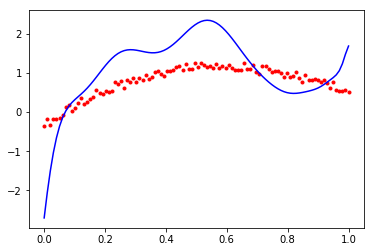

In [30]:
regularisation(X,y,0)

# Optimal Lambda based on CV

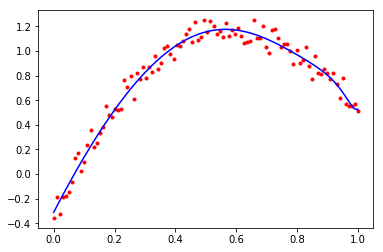

In [28]:
regularisation(X,y,optimal_lambda_CV)

# Underfit

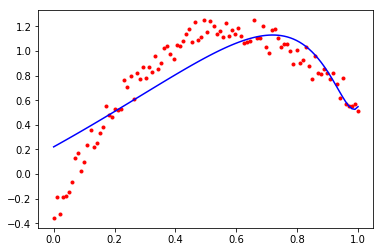

In [29]:
regularisation(X,y,1)

# Task 6 (CE6002)
* Use scikit-learn’s RidgeCV and LassoCV to obtain optimum l using the same transformed data (i.e. features up to 50th order).
* Observe the resulting Eout, and l compare these to previous results. What do you see? Is this what you expected?
* Compare the weights obtained with RidgeCV to those obtained with LassoCV. What do you see? Is this what you expected?

# Ridge CV

Score : 0.9726802799313319
Regularisation alpha : 0.00546685729972018
RidgeCV : 0.2635627595461787


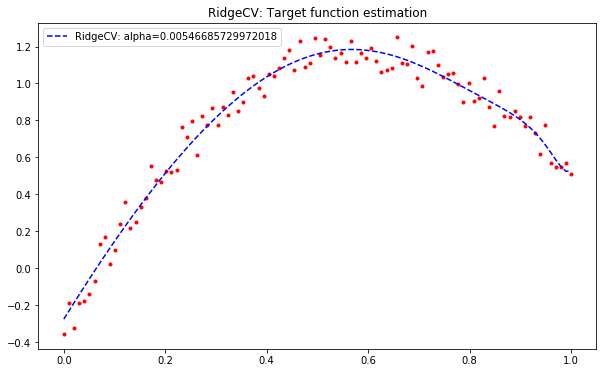

In [35]:
classifier_RidgeCV = RidgeCV(alphas=LAMBDAS_ALPHAS, cv=K_FOLDS)
classifier_RidgeCV.fit(X_trans, y)

ridgeCV_score  = classifier_RidgeCV.score(X_trans, y) 
predictions    = classifier_RidgeCV.predict(X_trans)

print("Score :", ridgeCV_score)
print("Regularisation alpha :", classifier_RidgeCV.alpha_)

ridgeCV_eout  = calc_error(classifier_RidgeCV.coef_, X_test, y_test)
print("RidgeCV :", ridgeCV_eout)

# Plotting the curves
plt.figure(figsize=(10,6))
plt.title('RidgeCV: Target function estimation')
plt.plot(X, y, 'r.')
plt.plot(X, predictions,'b--', label='RidgeCV: alpha=' + str(classifier_RidgeCV.alpha_))
plt.legend(loc='best')
plt.show()

# Lasso CV

Score : 0.9737562462735899
Regularisation alpha lasso: 5.3177231778509664e-05
Eout on LassoCV : 0.3128597149291872


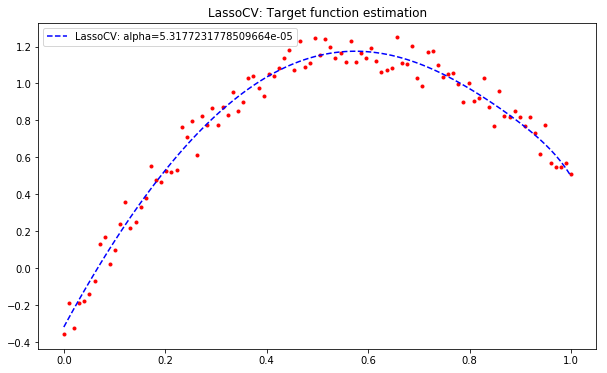

In [34]:
classifier_lassoCV = LassoCV(alphas=LAMBDAS_ALPHAS, cv=K_FOLDS, random_state=5, n_jobs=-2)
classifier_lassoCV.fit(X_trans, y)

lassoCV_score = classifier_lassoCV.score(X_trans, y) 
predictions = classifier_lassoCV.predict(X_trans)

print("Score :", lassoCV_score)
print("Regularisation alpha lasso:", classifier_lassoCV.alpha_)

lassoCV_eout = calc_error(classifier_lassoCV.coef_, X_test, y_test)
print("Eout on LassoCV :", lasso_eout)

# Plotting the curves
plt.figure(figsize=(10,6))
plt.title('LassoCV: Target function estimation')
plt.plot(X, y, 'r.')
plt.plot(X, predictions, 'b--', label='LassoCV: alpha=' + str(classifier_lassoCV.alpha_))
plt.legend(loc='best')
plt.show()

In [46]:
print('Eout for Lasso CV            :', lassoCV_eout)
print('Eout for Ridge CV            :', ridgeCV_eout)
print('KFold Cross Validation Eout :', min_eout)

Eout for Lasso CV            : 0.3128597149291872
Eout for Ridge CV            : 0.2635627595461787
KFold Cross Validation Eout : 0.06992813112712774


In [47]:
print("\n -------- Weights ----------\n")
print("\n -------- Ridge CV ----------\n")
print(classifier_RidgeCV.coef_)
print("\n -------- Lasso CV ----------\n")
print(classifier_lassoCV.coef_)


 -------- Weights ----------


 -------- Ridge CV ----------

[ 0.00000000e+00  4.42948441e+00 -2.01050115e+00 -1.85172325e+00
 -8.32766855e-01 -1.04505320e-01  2.69460179e-01  4.03462171e-01
  4.03245878e-01  3.39508449e-01  2.53799056e-01  1.68191620e-01
  9.29452735e-02  3.16468310e-02 -1.55963087e-02 -5.02817936e-02
 -7.44718535e-02 -9.02560183e-02 -9.95045971e-02 -1.03782050e-01
 -1.04342473e-01 -1.02162662e-01 -9.79884114e-02 -9.23815611e-02
 -8.57620810e-02 -7.84431659e-02 -7.06591948e-02 -6.25872856e-02
 -5.43634828e-02 -4.60946500e-02 -3.78670299e-02 -2.97522875e-02
 -2.18116896e-02 -1.40989343e-02 -6.66201959e-03  4.55556493e-04
  7.21405105e-03  1.35770317e-02  1.95111232e-02  2.49858692e-02
  2.99736571e-02  3.44496733e-02  3.83918651e-02  4.17808990e-02
  4.46001063e-02  4.68354142e-02  4.84752617e-02  4.95105018e-02
  4.99342911e-02  4.97419700e-02  4.89309363e-02]

 -------- Lasso CV ----------

[ 0.00000000e+00  5.04362274e+00 -3.85387877e+00 -7.62166651e-01
 -0.000000